# Kernel - Spectral Analysis

Below is code written to preform spectral analysis on the eigenvalues and eigenvectors derived from the kernel matrix generated during training.

In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Imports

In [30]:
# imports
from matplotlib import pyplot as plt
import numpy as np

import os

import re

# import data class
from utilities.dataset_utils import DiabetesData

from qiskit_machine_learning.algorithms import QSVC

# explainability imports

# qiskit imports
# simulator
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as Sampler

In [31]:
np.random.seed(42)  # reproducibility

Dataset loading - change code hear to analyze different dataset

**N.B.** works only for binary classification datasets

In [32]:
# path to diabetes.csv
path = os.path.join(os.getcwd(), '..', '..', '..', 'utilities', 'diabetes.csv')
# load dataset class
dataset = DiabetesData(path)

In [33]:
# path to diabetes.csv
path = os.path.join(os.getcwd(), '..', '..', '..', 'models', 'qml-simulator', 'qsvc_best_params.model')

qsvc = QSVC.load(path)

In [34]:
# list of feature names
feature_names = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age"
]

In [35]:
# get data
X_train, X_test, y_train, y_test = dataset.preprocess_data_ranged()

In [36]:
# setup backend simulator
backend = AerSimulator()
backend.set_options(max_parallel_threads=os.cpu_count(), method='statevector')

In [37]:
# sampler
sampler = Sampler.from_backend(backend)

In [38]:
# path to kernel matrix evaluation output
path = os.path.join(os.getcwd(), '..', '..', '..', 'utilities', 'kernel_matrix_train.txt')

with open(path, 'r') as f:
    lines = f.readlines()

In [39]:
# regex pattern to extract the kernel matrix
pattern = r'Kernel val for pair\s*\((\d+),\s*(\d+)\):\s*([\d\.]+)'

In [40]:
# get matrix size
max_index = 0
for line in lines:
    match = re.search(pattern, line)
    if match:
        i = int(match.group(1))
        j = int(match.group(2))
        max_index = max(max_index, i, j)

In [41]:
# init matrix
n = max_index + 1

K = np.zeros((n, n))

In [42]:
# fill matrix with values from file
for line in lines:
    match = re.search(pattern, line)
    if match:
        i = int(match.group(1))
        j = int(match.group(2))
        val = float(match.group(3))
        K[i, j] = val

In [43]:
K

array([[1.        , 0.03417969, 0.19824219, ..., 0.17285156, 0.21582031,
        0.26171875],
       [0.02929688, 1.        , 0.171875  , ..., 0.20703125, 0.25      ,
        0.09472656],
       [0.16992188, 0.19824219, 1.        , ..., 0.27832031, 0.29394531,
        0.17382812],
       ...,
       [0.19140625, 0.22558594, 0.26660156, ..., 1.        , 0.21289062,
        0.05664062],
       [0.21679688, 0.27246094, 0.31835938, ..., 0.203125  , 1.        ,
        0.40136719],
       [0.29394531, 0.10644531, 0.18945312, ..., 0.06152344, 0.40332031,
        1.        ]])

In [47]:
# Compute the eigenvalues and eigenvectors.
eigenvalues, eigenvectors = np.linalg.eigh(K)

# For visualization, you might want to sort the eigenvalues in descending order.
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

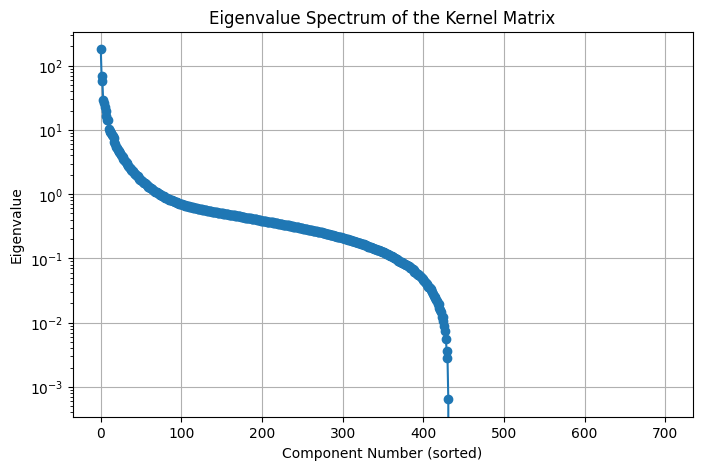

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(sorted_eigenvalues, marker='o')
plt.title("Eigenvalue Spectrum of the Kernel Matrix")
plt.xlabel("Component Number (sorted)")
plt.ylabel("Eigenvalue")
plt.yscale('log')
plt.grid(True)
plt.show()